# Working with H3 in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/01_h3.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/01_h3.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/01_h3.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/01_h3.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

## Install vgrid

In [2]:
# %pip install vgrid --upgrade

## latlon2h3

In [3]:
from vgrid.conversion.latlon2dggs import latlon2h3

lat = 10.775276
lon = 106.706797
res = 9
h3_id = latlon2h3(lat, lon, 10)
h3_id

'8a65b56628e7fff'

### H3 to Shapely Polygon

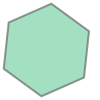

In [4]:
from vgrid.conversion.dggs2geo.h32geo import h32geo
h3_geo = h32geo(h3_id)
h3_geo

### H3 to GeoJSON        

In [5]:
from vgrid.conversion.dggs2geo.h32geo import h32geojson

h3_geojson = h32geojson(h3_id)
h3_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.70713615426936, 10.774978441229653),
      (106.70721514572995, 10.775713374905791),
      (106.70661718075799, 10.776150587194028),
      (106.70594022237229, 10.77585286364977),
      (106.70586123315323, 10.77511792678204),
      (106.70645920007833, 10.774680716650128),
      (106.70713615426936, 10.774978441229653)),)},
   'properties': {'h3': '8a65b56628e7fff',
    'resolution': '8a65b56628e7fff',
    'center_lat': 10.7754157,
    'center_lon': 106.7065382,
    'avg_edge_len': 81.374,
    'cell_area': 17202.984,
    'cell_perimeter': 488.243}}]}

### Vector to H3

Processing features: 100%|██████████| 4/4 [00:00<00:00, 156.62it/s]


<Axes: >

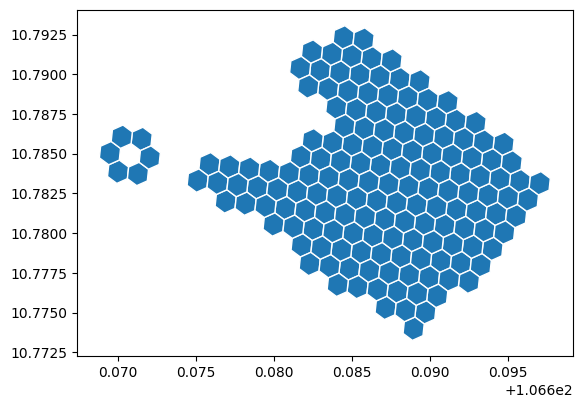

In [6]:
from vgrid.conversion.vector2dggs.vector2h3 import vector2h3

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_h3 = vector2h3(file_path, resolution=10, compact=False, 
                predicate = "centroid_within", output_format="gpd")

vector_to_h3.plot(edgecolor="white")

### H3 Compact

<Axes: >

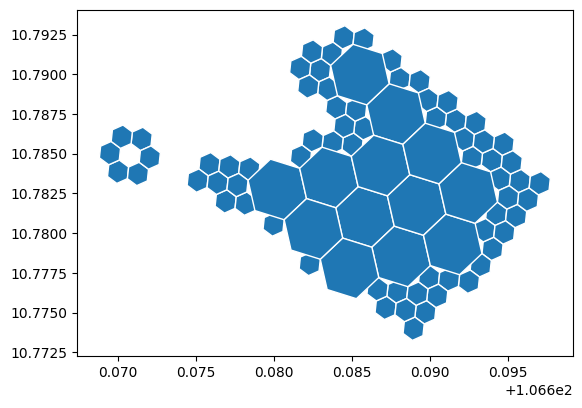

In [7]:
from vgrid.conversion.dggscompact.h3compact import h3compact
h3_compacted = h3compact(vector_to_h3,output_format="gpd")
h3_compacted.plot(edgecolor="white")

### H3 Expand

<Axes: >

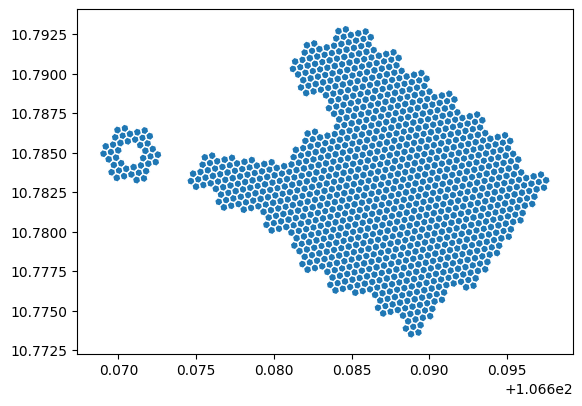

In [8]:
from vgrid.conversion.dggscompact.h3compact import h3expand

h3_expanded = h3expand(
    h3_compacted, resolution=11, output_format="gpd"
)   
h3_expanded.plot(edgecolor="white")

### H3 Binning

Generating H3 DGGS: 100%|██████████| 1076/1076 [00:00<00:00, 8743.82it/s]


<Axes: >

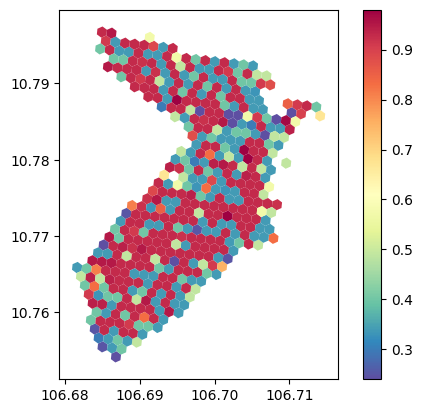

In [20]:
from vgrid.binning.h3bin import h3bin
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats="majority"
h3_bin = h3bin(file_path, resolution=10, stats=stats, 
                numeric_field="confidence",
                # category="category",
                output_format="gpd")
h3_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)


### Raster to H3

In [10]:
# %pip install folium

In [11]:
from vgrid.conversion.raster2dggs.raster2h3 import raster2h3
from vgrid.utils.io import download_file

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_h3 =  raster2h3(raster_file,output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

h3_layer = folium.GeoJson(
    raster_to_h3,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["h3", "resolution", "band_1", "band_2", "band_3", "cell_area"],
        aliases=["H3 ID", "Resolution", "Band 1", "Band 2", "Band 3", "Area (m²)"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(h3_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db
WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
Nearest H3 resolution determined: 15


Converting raster to H3: 100%|██████████| 3059/3059 [00:00<00:00, 11021.85 cells/s]


### H3 Generator

Generating H3 DGGS: 100%|██████████| 122/122 [00:00<00:00, 5061.78 cells/s]


<Axes: >

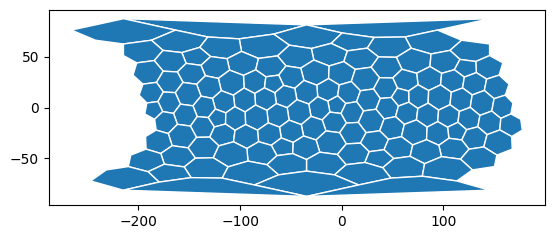

In [12]:
from vgrid.generator.h3grid import h3grid
h3_grid = h3grid(resolution=0)
h3_grid.plot(edgecolor="white")

### H3 Inspect

In [13]:
from vgrid.stats.h3stats import h3inspect
resolution = 3
h3_inspect = h3inspect(resolution)
h3_inspect.head()

Generating H3 DGGS: 100%|██████████| 41162/41162 [00:03<00:00, 10565.30 cells/s]


h3  resolution  center_lat  center_lon  avg_edge_len  \
0  830000fffffffff           3   79.243774   38.024416     68843.990   
1  830001fffffffff           3   80.118133   34.269779     68959.672   
2  830002fffffffff           3   79.248915   43.752678     69357.427   
3  830003fffffffff           3   80.192303   40.496153     69494.753   
4  830004fffffffff           3   78.291383   35.976646     68171.344   

      cell_area  cell_perimeter  \
0  1.229263e+10      413063.941   
1  1.233470e+10      413758.031   
2  1.247975e+10      416144.564   
3  1.253001e+10      416968.517   
4  1.204928e+10      409028.064   

                                            geometry  crossed  is_pentagon  \
0  POLYGON ((38.40265 78.62862, 40.9926 78.94864,...    False        False   
1  POLYGON ((34.90645 79.50578, 37.59652 79.85885...    False        False   
2  POLYGON ((43.80951 78.62667, 46.57082 78.89905...    False        False   
3  POLYGON ((40.75903 79.56831, 43.68502 79.87171...    False        False   
4  POLYGON ((36.42872 77.68575, 38.74177 78.01773...    False        False   

   norm_area       ipq       zsc  
0   0.992008  0.905357  0.951491  
1   0.995403  0.905410  0.951519  
2   1.007109  0.905581  0.951609  
3   1.011165  0.905638  0.951639  
4   0.972370  0.905034  0.951321

### Distribution of H3 Area Distortions

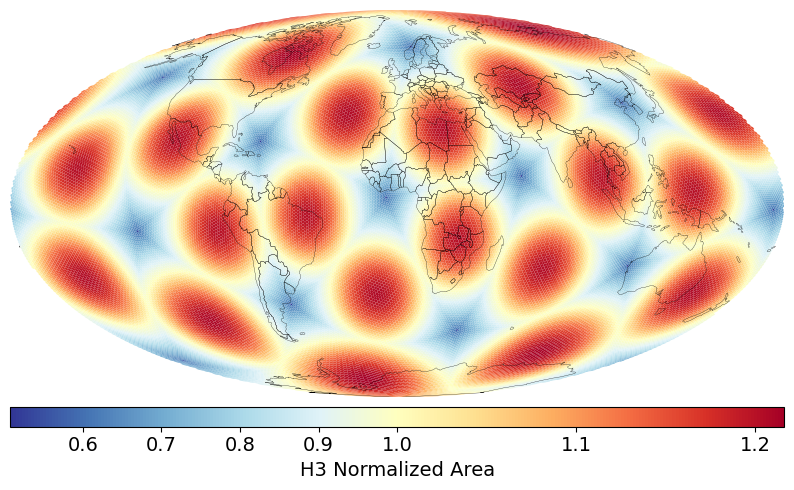

In [14]:
from vgrid.stats.h3stats import h3_norm_area
h3_norm_area(h3_inspect)

### Distribution of H3 IPQ Compactness

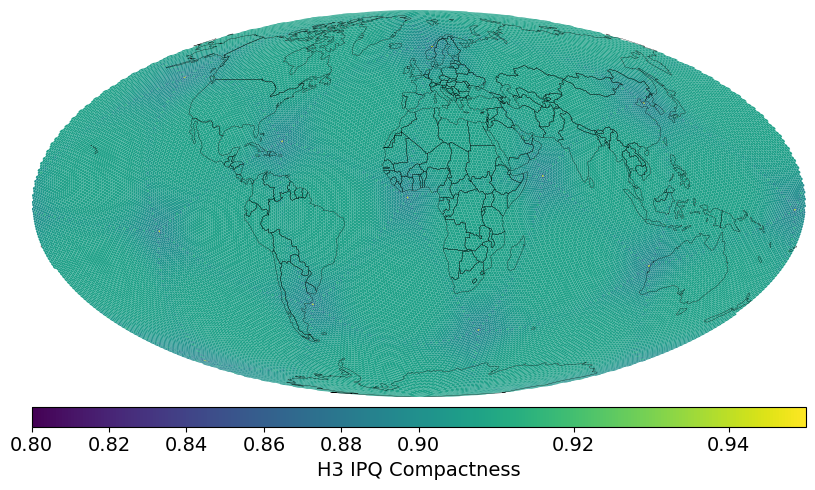

In [21]:
from vgrid.stats.h3stats import h3_compactness
h3_compactness(h3_inspect)

### H3 Statistics

In [22]:
from vgrid.stats.h3stats import h3stats
h3_stats = h3stats('km')
h3_stats

resolution  number_of_cells  avg_edge_len_km  avg_area_km2  min_area_km2  \
0            0              122      1107.712591  4.357449e+06  2.562182e+06   
1            1              842       418.676005  6.097884e+05  3.284346e+05   
2            2             5882       158.244656  8.680178e+04  4.493090e+04   
3            3            41162        59.810858  1.239343e+04  6.315472e+03   
4            4           288122        22.606379  1.770348e+03  8.965824e+02   
5            5          2016842         8.544408  2.529039e+02  1.277856e+02   
6            6         14117882         3.229483  3.612906e+01  1.823875e+01   
7            7         98825162         1.220630  5.161293e+00  2.604669e+00   
8            8        691776122         0.461355  7.373276e-01  3.720480e-01   
9            9       4842432842         0.174376  1.053325e-01  5.314719e-02   
10          10      33897029882         0.065908  1.504750e-02  7.592318e-03   
11          11     237279209162         0.024911  2.149643e-03  1.084609e-03   
12          12    1660954464122         0.009416  3.070919e-04  1.549438e-04   
13          13   11626681248842         0.003560  4.387027e-05  2.213481e-05   
14          14   81386768741882         0.001349  6.267181e-06  3.162114e-06   
15          15  569707381193162         0.000510  8.953116e-07  4.517305e-07   

    max_area_km2  max_min_ratio  
0   4.977807e+06       1.942800  
1   7.294869e+05       2.221102  
2   1.045998e+05       2.328015  
3   1.495077e+04       2.367325  
4   2.135987e+03       2.382366  
5   3.051443e+02       2.387940  
6   4.359211e+01       2.390082  
7   6.227446e+00       2.390878  
8   8.896352e-01       2.391184  
9   1.270907e-01       2.391297  
10  1.815582e-02       2.391341  
11  2.593689e-03       2.391357  
12  3.705269e-04       2.391363  
13  5.293242e-05       2.391366  
14  7.561774e-06       2.391367  
15  1.080253e-06       2.391367